In [1]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# Important notes for understanding data
# Fake news is represented by 1
# True news is represented by 0

In [76]:
### Importing libraries
# shift+Tab
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import re # regular expression for searching only for the text in the document

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import string
from nltk.corpus import stopwords #natural langauge toolkit 
from nltk.stem.porter import PorterStemmer #to take a word and removes the prefix/suffix and returns just the root
from sklearn.feature_extraction.text import TfidfVectorizer #this will be needed to convert the text to features/vector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
import nltk
nltk.download('stopwords') 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# After uploading the datasets, now adding it to a panda DataFrame
truedataset = pd.read_csv('True.csv')
truedataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [25]:
# Size of True data
truedataset.shape

(21417, 4)

In [26]:
fakedataset = pd.read_csv('Fake.csv')
fakedataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [27]:
fakedataset.shape 

(23481, 4)

In [28]:
# Now figuring out if there is any missing data 
truedataset.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [29]:
# Now figuring out if there is any missing data 
fakedataset.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [30]:
fakedataset["value"] = 1
truedataset["value"] = 0

In [31]:
df = pd.concat([truedataset,fakedataset])

In [32]:
# some data labels can be grouped such as the author and subject - creating a new coloumn with the header of Summary
df['summary'] = df['title']+' '+df['text']

In [33]:
df

,title,text,subject,date,value,summary
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,McPain: John McCain Furious That Iran Treated ...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,How to Blow $700 Million: Al Jazeera America F...


# Preprocessing

In [18]:
from gensim.parsing.preprocessing import preprocess_string

In [36]:
df.head(10)

,title,text,subject,date,value,summary
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0,"White House, Congress prepare for talks on spe..."
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0,"Trump says Russia probe will be fair, but time..."
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0,Factbox: Trump on Twitter (Dec 29) - Approval ...
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0,Trump on Twitter (Dec 28) - Global Warming The...
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0,Alabama official to certify Senator-elect Jone...


In [49]:
df['summary_processed'] = df['summary'].apply(lambda x:' '.join(preprocess_string(x)))

In [52]:
df['summary_processed'] 

0        budget fight loom republican flip fiscal scrip...
1        militari accept transgend recruit mondai penta...
2        senior republican senat let mueller job washin...
3        fbi russia probe help australian diplomat tip ...
4        trump want postal servic charg amazon shipment...
                               ...                        
23476    mcpain john mccain furiou iran treat sailor ce...
23477    justic yahoo settl mail privaci class action l...
23478    sunnistan alli ‘safe zone’ plan territori boot...
23479    blow million jazeera america final call quit c...
23480    navi sailor held iranian militari sign neocon ...
Name: summary_processed, Length: 44898, dtype: object

In [48]:
df

,title,text,subject,date,value,summary,summary_processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, loom, republican, flip, fiscal..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...,"[militari, accept, transgend, recruit, mondai,..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senat, let, mueller, job,..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...,"[fbi, russia, probe, help, australian, diploma..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...,"[trump, want, postal, servic, charg, amazon, s..."
...,...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furiou, iran, treat, sa..."
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justic, yahoo, settl, mail, privaci, class, a..."
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, alli, ‘safe, zone’, plan, territor..."
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, final, call,..."


In [87]:
df_small = df.sample(10000)

In [88]:
# max is 44898

# feature
X = df_small['summary_processed']

# target
y = df_small['value']

In [89]:
X

18810    student newspap hillary’ alma mater it’ okai u...
5110     gabbi gifford flai trump incit ‘bloodshed’ sec...
16696    “you’r hire trump pull unemploi vet audienc hi...
957      trump get humili whine state refus voter info ...
2140     whoa trump state campaign chair bust shack hot...
                               ...                        
11497    trump shock support surpris visit huge ralli h...
21945    expos shakespearean tragedi “russia hacking” h...
13530    yike shock footag black live matter protest hi...
9155     wisconsin priest come “gay” sundai mass…get st...
1799     trump administr free fall ‘concret evidence’ l...
Name: summary_processed, Length: 10000, dtype: object

In [90]:
# build the tfidf model
vectorizer = TfidfVectorizer()

# fit the tfidf on X
vectorizer.fit(X)

# transform X into tfidf vector
X = vectorizer.transform(X)
X = X.toarray()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [92]:
y_train.value_counts()

1    4146
0    3854
Name: value, dtype: int64

In [93]:
# build the LogisticRegression model
lr = LogisticRegression()

# train the moel on training set
lr.fit(X_train,y_train)

# predict on test set

y_pred = lr.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred)

0.9715

# Graph

In [95]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

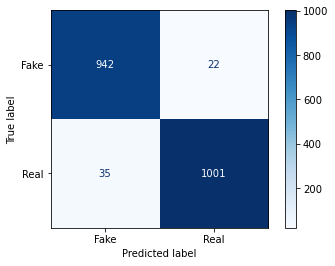

In [96]:
plot_confusion_matrix(lr, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fake','Real'])

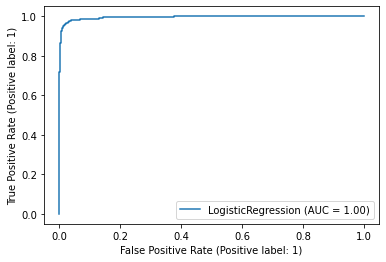

In [97]:
plot_roc_curve(lr, X_test, y_test)